In [1]:
#small dataset
import numpy as np  
import pandas as pd

usptodata = pd.read_csv('U.S. Patents.csv')
usptodataset=usptodata[["grant_id","claims_text","abstract"]]
usptodataset= usptodata.dropna()
US_Patent_df = usptodataset.reset_index(drop=True)
US_Patent_df= US_Patent_df[['grant_id','abstract']]
US_Patent_df

,grant_id,abstract
0,USPP030977,"A new and distinct variety of Mango plant, her..."
1,USPP030978,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...
2,USPP030979,"A new and distinct peach tree variety, <i>Prun..."
3,USPP030980,This invention relates to a new and distinct v...
4,USPP030981,A new and distinct cultivar of Strawberry plan...
...,...,...
7008,US10462947,Provided are a first component holding tool op...
7009,US10462948,In a case in which mounting deviation is occur...
7010,US10462949,A reel holding device is provided. The device ...
7011,US10462950,An electronic component bonding device include...


In [2]:
def cleantext(df): 
    
    US_Patent_df['cleaned_text'] = US_Patent_df['abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].str.lower()
    
    #remove numbers
    US_Patent_df['cleaned_text'] =US_Patent_df['cleaned_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    US_Patent_df['cleaned_text']  = US_Patent_df['cleaned_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    US_Patent_df['cleaned_text']  = US_Patent_df['cleaned_text'].replace(r'https.*$', "", regex = True)
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace("   ", " ", regex = True)
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace("  ", " ", regex = True)
   
    return US_Patent_df

df = cleantext(US_Patent_df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\inference.py:177: FutureWarning: Possible nested set at position 1
  re.compile(obj)


In [3]:
#remove stopwords and words_to_remove
import nltk
stopwords = nltk.corpus.stopwords.words('english')
df['cleaned_text_without_Stopwprd'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stopwords]))
df

,grant_id,abstract,cleaned_text,cleaned_text_without_Stopwprd
0,USPP030977,"A new and distinct variety of Mango plant, her...",a new and distinct variety of mango plant here...,new distinct variety mango plant herein referr...
1,USPP030978,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...,x honeysuckle rose x is a new variety derived...,x honeysuckle rose x new variety derived x sim...
2,USPP030979,"A new and distinct peach tree variety, <i>Prun...",a new and distinct peach tree variety i prunus...,new distinct peach tree variety prunus persica...
3,USPP030980,This invention relates to a new and distinct v...,this invention relates to a new and distinct v...,invention relates new distinct variety red ras...
4,USPP030981,A new and distinct cultivar of Strawberry plan...,a new and distinct cultivar of strawberry plan...,new distinct cultivar strawberry plant named x...
...,...,...,...,...
7008,US10462947,Provided are a first component holding tool op...,provided are a first component holding tool op...,provided first component holding tool operatin...
7009,US10462948,In a case in which mounting deviation is occur...,in a case in which mounting deviation is occur...,case mounting deviation occurring component mo...
7010,US10462949,A reel holding device is provided. The device ...,a reel holding device is provided the device i...,reel holding device provided device includes c...
7011,US10462950,An electronic component bonding device include...,an electronic component bonding device include...,electronic component bonding device includes m...


In [4]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df["Lemmatization"] = df["cleaned_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))
df

,grant_id,abstract,cleaned_text,cleaned_text_without_Stopwprd,Lemmatization
0,USPP030977,"A new and distinct variety of Mango plant, her...",a new and distinct variety of mango plant here...,new distinct variety mango plant herein referr...,new distinct variety mango plant herein referr...
1,USPP030978,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...,x honeysuckle rose x is a new variety derived...,x honeysuckle rose x new variety derived x sim...,x honeysuckle rose x new variety derived x sim...
2,USPP030979,"A new and distinct peach tree variety, <i>Prun...",a new and distinct peach tree variety i prunus...,new distinct peach tree variety prunus persica...,new distinct peach tree variety prunus persica...
3,USPP030980,This invention relates to a new and distinct v...,this invention relates to a new and distinct v...,invention relates new distinct variety red ras...,invention relates new distinct variety red ras...
4,USPP030981,A new and distinct cultivar of Strawberry plan...,a new and distinct cultivar of strawberry plan...,new distinct cultivar strawberry plant named x...,new distinct cultivar strawberry plant named x...
...,...,...,...,...,...
7008,US10462947,Provided are a first component holding tool op...,provided are a first component holding tool op...,provided first component holding tool operatin...,provided first component holding tool operatin...
7009,US10462948,In a case in which mounting deviation is occur...,in a case in which mounting deviation is occur...,case mounting deviation occurring component mo...,case mounting deviation occurring component mo...
7010,US10462949,A reel holding device is provided. The device ...,a reel holding device is provided the device i...,reel holding device provided device includes c...,reel holding device provided device includes c...
7011,US10462950,An electronic component bonding device include...,an electronic component bonding device include...,electronic component bonding device includes m...,electronic component bonding device includes m...


In [12]:
# HDBSCAN
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)


hdbscan_model = HDBSCAN(min_cluster_size=15,min_samples = 10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
topic_model = BERTopic(umap_model=umap_model, embedding_model=sentence_model, hdbscan_model=hdbscan_model)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df['Lemmatization']) 

topic_model.get_topic_info()

,Topic,Count,Name
0,-1,2954,-1_device_system_data_first
1,0,332,0_composition_acid_invention_protein
2,1,289,1_semiconductor_layer_gate_substrate
3,2,227,2_wireless_station_communication_network
4,3,202,3_image_pixel_imaging_object
...,...,...,...
76,75,15,75_sole_shoe_toe_foot
77,76,15,76_laser_beam_radiation_energy
78,77,15,77_sensor_altitude_monitoring_monitor
79,78,15,78_heating_heat_induction_thermal


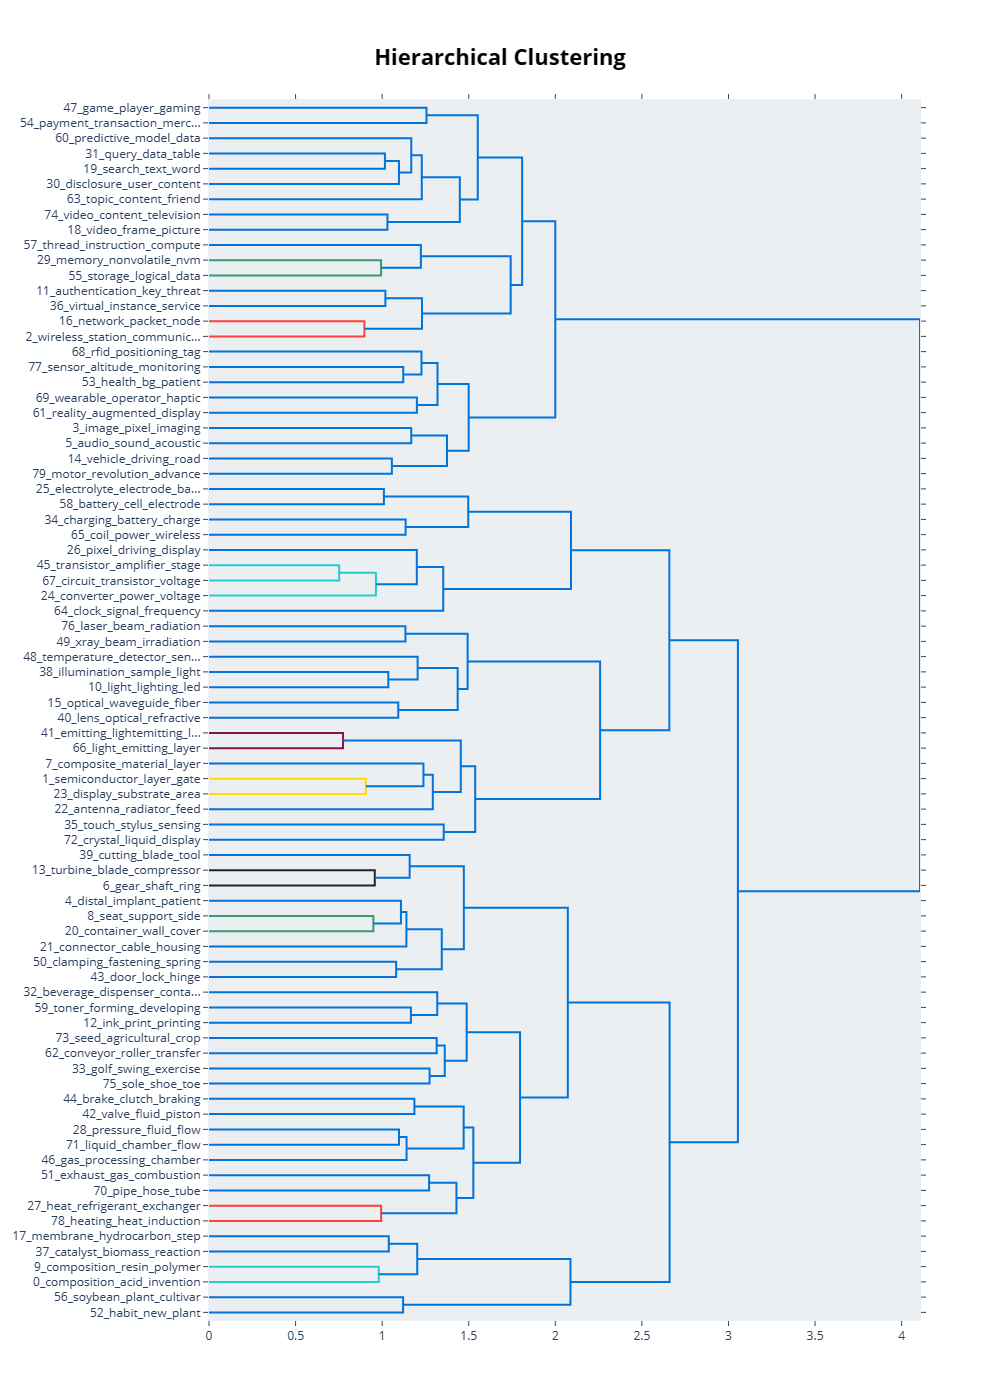

In [14]:
#topic_model.visualize_hierarchy()

In [15]:
# HDBSCAN
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)


hdbscan_model = HDBSCAN(min_cluster_size=5, min_samples = 10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
topic_model = BERTopic(umap_model=umap_model, embedding_model=sentence_model, hdbscan_model=hdbscan_model)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df['Lemmatization']) 

topic_model.get_topic_info()

,Topic,Count,Name
0,-1,3059,-1_device_system_first_one
1,0,332,0_composition_acid_invention_protein
2,1,202,1_image_pixel_imaging_object
3,2,201,2_semiconductor_layer_gate_substrate
4,3,188,3_distal_implant_patient_catheter
...,...,...,...
104,103,7,103_comparable_code_event_file
105,104,7,104_ppg_heart_robot_rate
106,105,6,105_feces_bowl_urine_disposal
107,106,6,106_directory_record_file_session


In [18]:
#topic_model.visualize_hierarchy()

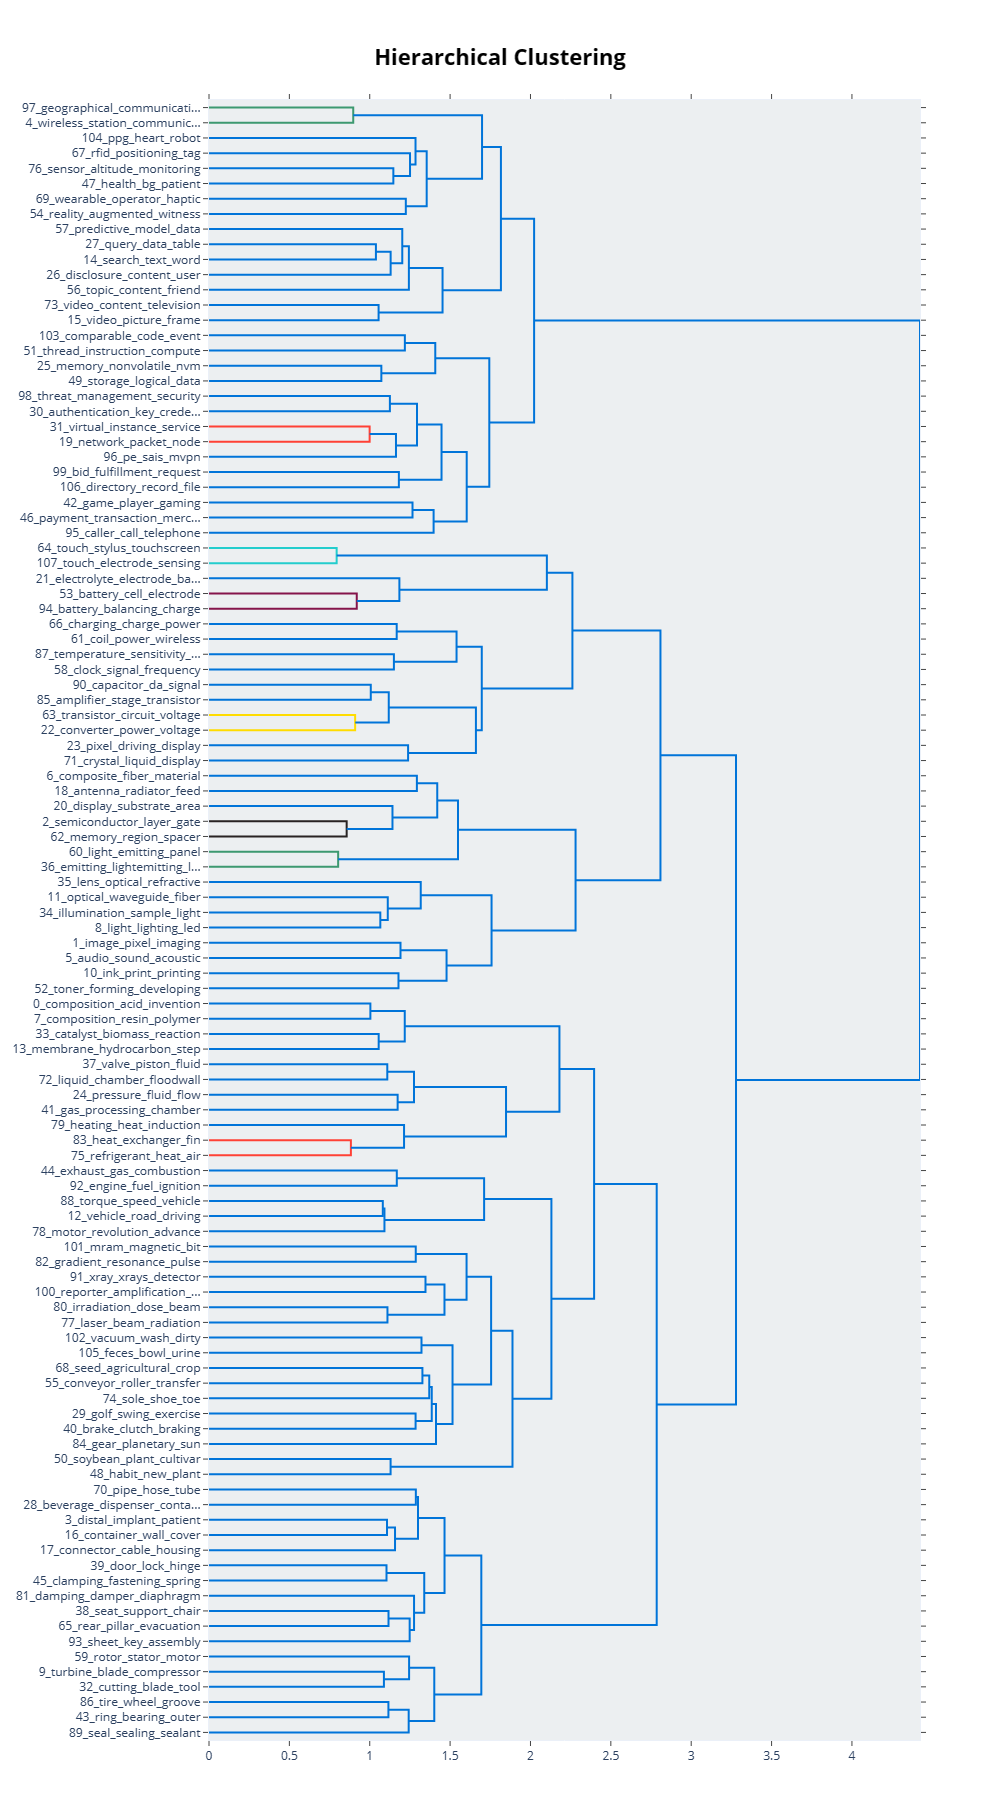

In [17]:
# HDBSCAN
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)


hdbscan_model = HDBSCAN(min_cluster_size=30, min_samples = 10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
topic_model = BERTopic(umap_model=umap_model, embedding_model=sentence_model, hdbscan_model=hdbscan_model)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df['Lemmatization']) 

topic_model.get_topic_info()

,Topic,Count,Name
0,-1,2878,-1_device_first_system_data
1,0,364,0_sub_composition_material_resin
2,1,332,1_composition_acid_invention_protein
3,2,289,2_layer_semiconductor_substrate_gate
4,3,234,3_vehicle_sensor_system_based
5,4,227,4_wireless_station_communication_network
6,5,202,5_image_pixel_imaging_object
7,6,188,6_distal_patient_implant_valve
8,7,185,7_seat_portion_wall_support
9,8,162,8_voltage_circuit_power_output


In [20]:
#topic_model.visualize_hierarchy()

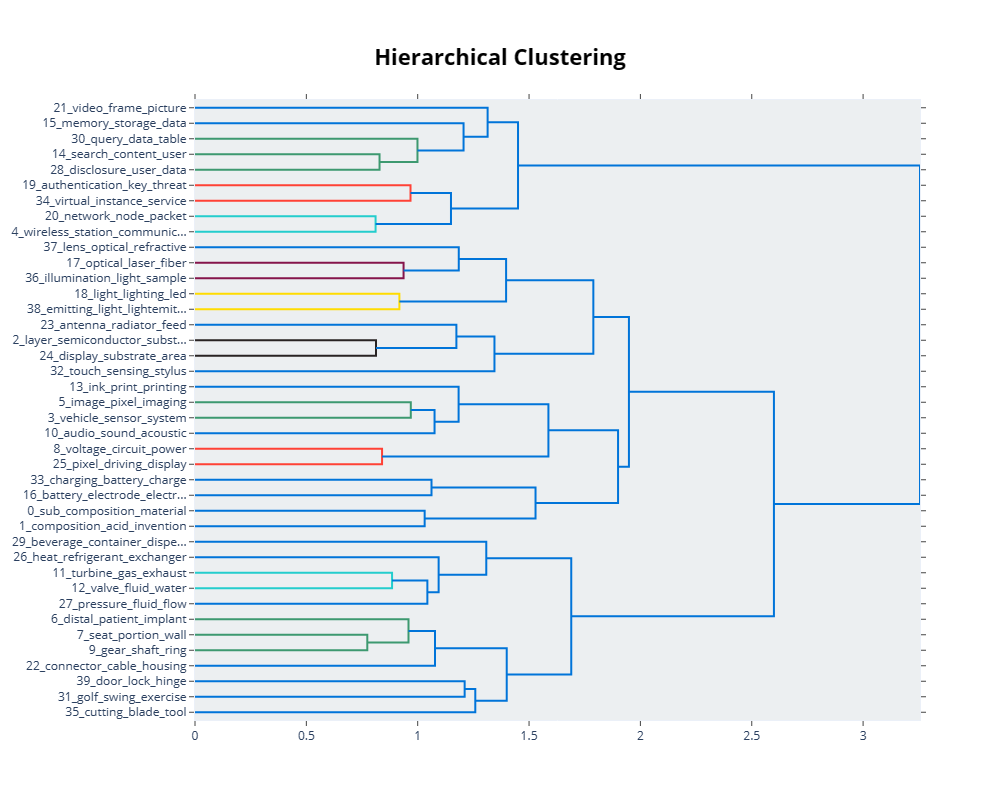

In [21]:
#K-mean
from bertopic import BERTopic
from sklearn.cluster import KMeans
from umap import UMAP
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)


cluster_model = KMeans(n_clusters=30)
topic_model = BERTopic(umap_model=umap_model, embedding_model=sentence_model, hdbscan_model=cluster_model)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df['Lemmatization']) 

topic_model.get_topic_info()


,Topic,Count,Name
0,0,440,0_device_network_user_service
1,1,371,1_communication_wireless_network_device
2,2,368,2_data_memory_storage_plurality
3,3,343,3_image_display_video_object
4,4,342,4_portion_member_end_position
5,5,337,5_layer_semiconductor_substrate_region
6,6,330,6_valve_fluid_flow_chamber
7,7,325,7_composition_acid_invention_present
8,8,308,8_air_heat_gas_turbine
9,9,304,9_content_user_game_data


In [22]:
import pandas as pd

data = {'Clustering_Method': ['HDBSCAN(min_cluster_size=5)', 'HDBSCAN(min_cluster_size=15)', 'HDBSCAN(min_cluster_size=30)', 'k-Means'],
        'Number_of_topics': [108,81,40,29]
        }

df = pd.DataFrame(data).sort_values(by=['Number_of_topics'], ascending=True)

df

,Clustering_Method,Number_of_topics
3,k-Means,29
2,HDBSCAN(min_cluster_size=30),40
1,HDBSCAN(min_cluster_size=15),81
0,HDBSCAN(min_cluster_size=5),108


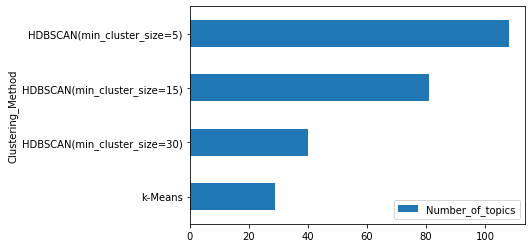

In [24]:
ax = df.plot.barh(x='Clustering_Method', y='Number_of_topics', rot=0)